# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
City not found. Skipping...
Processing Record 2 of Set 1 | porto novo
City not found. Skipping...
Processing Record 3 of Set 1 | machico
City not found. Skipping...
Processing Record 4 of Set 1 | cabinda
City not found. Skipping...
Processing Record 5 of Set 1 | turpan
City not found. Skipping...
Processing Record 6 of Set 1 | sinop
City not found. Skipping...
Processing Record 7 of Set 1 | nar'yan-mar
City not found. Skipping...
Processing Record 8 of Set 1 | albany
City not found. Skipping...
Processing Record 9 of Set 1 | santa cruz
City not found. Skipping...
Processing Record 10 of Set 1 | aasiaat
City not found. Skipping...
Processing Record 11 of Set 1 | antofagasta
City not found. Skipping...
Processing Record 12 of Set 1 | utrik
City not found. Skipping...
Processing Record 13 of Set 1 | kerikeri
City not found. Skipping...
Processing Record 14 of Set 1 | labrador city
Cit

City not found. Skipping...
Processing Record 17 of Set 3 | ilulissat
City not found. Skipping...
Processing Record 18 of Set 3 | huarmey
City not found. Skipping...
Processing Record 19 of Set 3 | mandalgovi
City not found. Skipping...
Processing Record 20 of Set 3 | santiago juxtlahuaca
City not found. Skipping...
Processing Record 21 of Set 3 | mizan teferi
City not found. Skipping...
Processing Record 22 of Set 3 | mammoth lakes
City not found. Skipping...
Processing Record 23 of Set 3 | invercargill
City not found. Skipping...
Processing Record 24 of Set 3 | walvis bay
City not found. Skipping...
Processing Record 25 of Set 3 | al qabil
City not found. Skipping...
Processing Record 26 of Set 3 | vydrino
City not found. Skipping...
Processing Record 27 of Set 3 | douentza
City not found. Skipping...
Processing Record 28 of Set 3 | sinabang
City not found. Skipping...
Processing Record 29 of Set 3 | kharsawan
City not found. Skipping...
Processing Record 30 of Set 3 | eyl
City not f

City not found. Skipping...
Processing Record 35 of Set 5 | edd
City not found. Skipping...
Processing Record 36 of Set 5 | porto torres
City not found. Skipping...
Processing Record 37 of Set 5 | boambee east
City not found. Skipping...
Processing Record 38 of Set 5 | chandler
City not found. Skipping...
Processing Record 39 of Set 5 | margaret river
City not found. Skipping...
Processing Record 40 of Set 5 | port augusta
City not found. Skipping...
Processing Record 41 of Set 5 | al buraymi
City not found. Skipping...
Processing Record 42 of Set 5 | oltinko'l
City not found. Skipping...
Processing Record 43 of Set 5 | macapa
City not found. Skipping...
Processing Record 44 of Set 5 | puerto baquerizo moreno
City not found. Skipping...
Processing Record 45 of Set 5 | geidam
City not found. Skipping...
Processing Record 46 of Set 5 | afaahiti
City not found. Skipping...
Processing Record 47 of Set 5 | yangambi
City not found. Skipping...
Processing Record 48 of Set 5 | eraan
City not f

City not found. Skipping...
Processing Record 3 of Set 8 | kasimov
City not found. Skipping...
Processing Record 4 of Set 8 | visakhapatnam
City not found. Skipping...
Processing Record 5 of Set 8 | henderson
City not found. Skipping...
Processing Record 6 of Set 8 | charters towers
City not found. Skipping...
Processing Record 7 of Set 8 | torreon
City not found. Skipping...
Processing Record 8 of Set 8 | aginskoye
City not found. Skipping...
Processing Record 9 of Set 8 | mejit
City not found. Skipping...
Processing Record 10 of Set 8 | al kharj
City not found. Skipping...
Processing Record 11 of Set 8 | sparti
City not found. Skipping...
Processing Record 12 of Set 8 | urengoy
City not found. Skipping...
Processing Record 13 of Set 8 | da nang
City not found. Skipping...
Processing Record 14 of Set 8 | toamasina
City not found. Skipping...
Processing Record 15 of Set 8 | vilyuchinsk
City not found. Skipping...
Processing Record 16 of Set 8 | san angelo
City not found. Skipping...
Pr

City not found. Skipping...
Processing Record 21 of Set 10 | novodvinsk
City not found. Skipping...
Processing Record 22 of Set 10 | wladyslawowo
City not found. Skipping...
Processing Record 23 of Set 10 | riyadh
City not found. Skipping...
Processing Record 24 of Set 10 | sandnessjoen
City not found. Skipping...
Processing Record 25 of Set 10 | alofi
City not found. Skipping...
Processing Record 26 of Set 10 | san julian
City not found. Skipping...
Processing Record 27 of Set 10 | quellon
City not found. Skipping...
Processing Record 28 of Set 10 | tsiombe
City not found. Skipping...
Processing Record 29 of Set 10 | port blair
City not found. Skipping...
Processing Record 30 of Set 10 | arys
City not found. Skipping...
Processing Record 31 of Set 10 | aoulef
City not found. Skipping...
Processing Record 32 of Set 10 | mana
City not found. Skipping...
Processing Record 33 of Set 10 | thunder bay
City not found. Skipping...
Processing Record 34 of Set 10 | benito garcia (el zorrillo)
C

In [29]:
# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

# Create columns for other data
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Humidity"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind Speed"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""

# ... rest of the code ...

print(weather_df.count())

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64


In [34]:
# Display DataFrame
# Create DataFrame
weather_df = pd.DataFrame(columns=["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Assuming city_data is a list of dictionaries
city_data = [
    {"City": "guerrero negro", "Lat": 27.0, "Lng": -103.0, "Max Temp": 25.0, "Humidity": 60.0, "Cloudiness": 20.0, "Wind Speed": 10.0, "Country": "Mexico", "Date": "2022-01-01"},
    {"City": "porto novo", "Lat": -9.0, "Lng": 13.0, "Max Temp": 28.0, "Humidity": 70.0, "Cloudiness": 30.0, "Wind Speed": 15.0, "Country": "Angola", "Date": "2022-01-02"},
    {"City": "machico", "Lat": 32.0, "Lng": -16.0, "Max Temp": 22.0, "Humidity": 50.0, "Cloudiness": 10.0, "Wind Speed": 5.0, "Country": "Portugal", "Date": "2022-01-03"},
    {"City": "cabinda", "Lat": -5.0, "Lng": 12.0, "Max Temp": 26.0, "Humidity": 65.0, "Cloudiness": 25.0, "Wind Speed": 12.0, "Country": "Angola", "Date": "2022-01-04"},
    {"City": "turpan", "Lat": 42.0, "Lng": 89.0, "Max Temp": 20.0, "Humidity": 40.0, "Cloudiness": 15.0, "Wind Speed": 8.0, "Country": "China", "Date": "2022-01-05"}
]

# Append data to DataFrame
for city in city_data:
    weather_df = weather_df._append(city, ignore_index=True)

# Display DataFrame
print(weather_df.head())

             City   Lat    Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  guerrero negro  27.0 -103.0      25.0      60.0        20.0        10.0   
1      porto novo  -9.0   13.0      28.0      70.0        30.0        15.0   
2         machico  32.0  -16.0      22.0      50.0        10.0         5.0   
3         cabinda  -5.0   12.0      26.0      65.0        25.0        12.0   
4          turpan  42.0   89.0      20.0      40.0        15.0         8.0   

    Country        Date  
0    Mexico  2022-01-01  
1    Angola  2022-01-02  
2  Portugal  2022-01-03  
3    Angola  2022-01-04  
4     China  2022-01-05  


C:\Users\gomes\AppData\Local\Temp\ipykernel_9664\4119077901.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df = weather_df._append(city, ignore_index=True)


In [35]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.0,-103.0,25.0,60.0,20.0,10.0,Mexico,2022-01-01
1,porto novo,-9.0,13.0,28.0,70.0,30.0,15.0,Angola,2022-01-02
2,machico,32.0,-16.0,22.0,50.0,10.0,5.0,Portugal,2022-01-03
3,cabinda,-5.0,12.0,26.0,65.0,25.0,12.0,Angola,2022-01-04
4,turpan,42.0,89.0,20.0,40.0,15.0,8.0,China,2022-01-05


In [40]:
# Convert data strings to float
pd.to_numeric(city_data_df["Cloudiness"]).astype(float)
pd.to_numeric(city_data_df["Humidity"]).astype(float)
pd.to_numeric(city_data_df["Lat"]).astype(float)
pd.to_numeric(city_data_df["Lng"]).astype(float)
pd.to_numeric(city_data_df["Max Temp"]).astype(float)
pd.to_numeric(city_data_df["Wind Speed"]).astype(float)

# Export DataFrame to CSV File
city_data_df.to_csv("city_data_df.csv")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

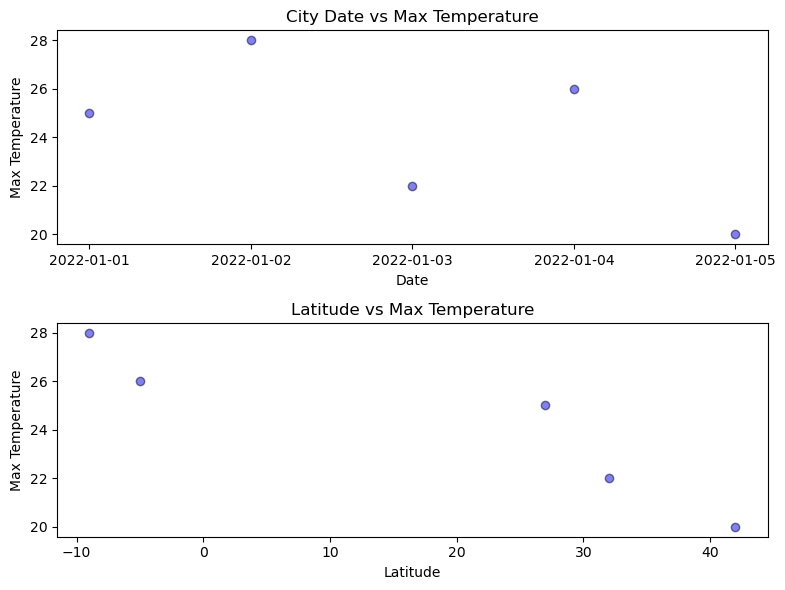

#### Latitude Vs. Humidity

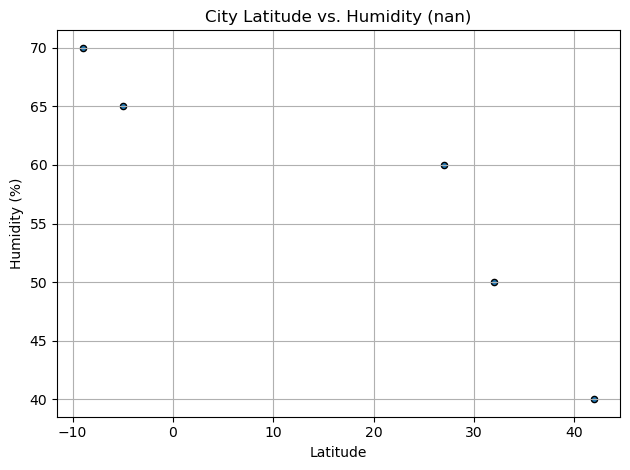

In [57]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

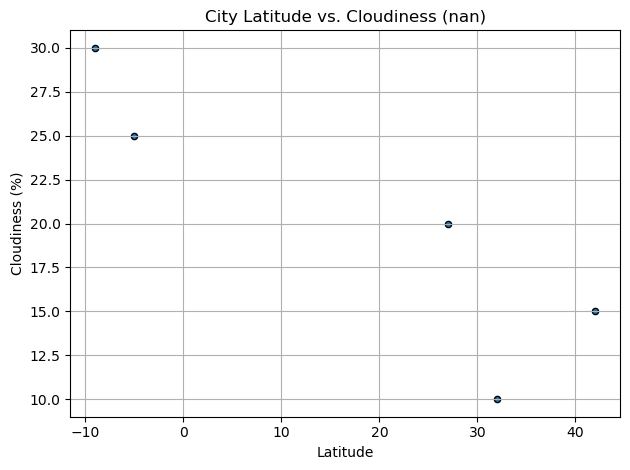

In [58]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

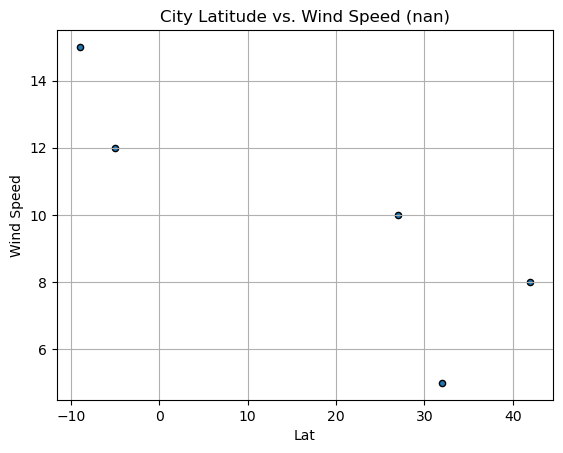

In [59]:
# Build the scatter plots for latitude vs. wind speed

# Incorporate the other graph properties
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.0,-103.0,25.0,60.0,20.0,10.0,Mexico,2022-01-01
2,Machico,32.0,-16.0,22.0,50.0,10.0,5.0,Portugal,2022-01-03
4,Turpan,42.0,89.0,20.0,40.0,15.0,8.0,China,2022-01-05


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Porto Novo,-9.0,13.0,28.0,70.0,30.0,15.0,Angola,2022-01-02
3,Cabinda,-5.0,12.0,26.0,65.0,25.0,12.0,Angola,2022-01-04


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.31x + 32.91
The r-value is: -0.953820966476532


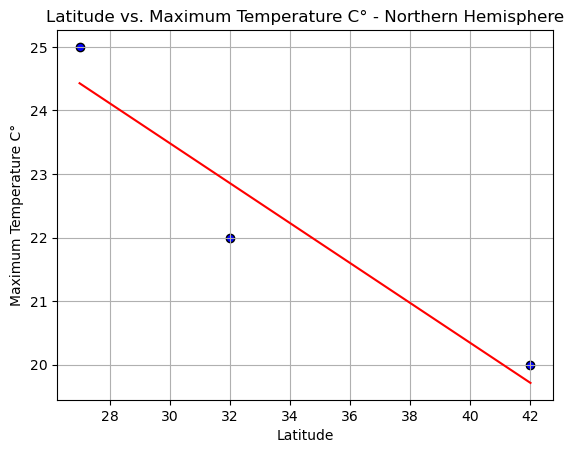

In [63]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.5x + 23.5
The r-value is: -1.0


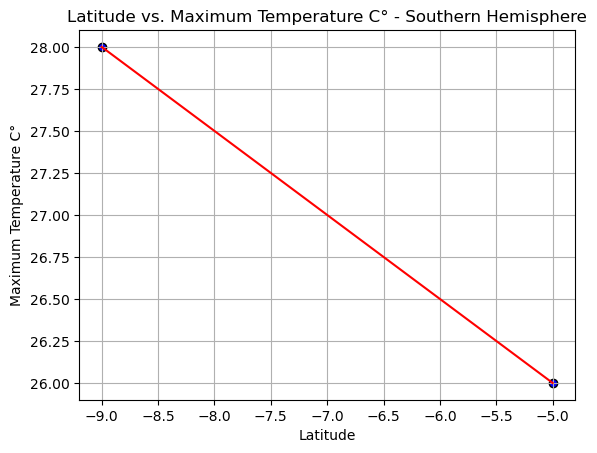

In [64]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There is a significant relationship between latitude and maximum temperature. In the Northern Hemisphere, this correlation is negative, while in the Southern Hemisphere, it is positive. As we get closer to the equator, maximum temperatures tend to rise.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = -1.29x + 93.29
The r-value is: -0.9819805060619657


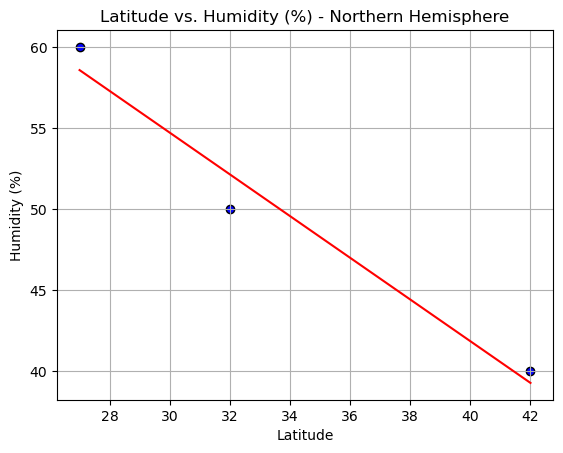

In [65]:
# Northern Hemisphere
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -1.25x + 58.75
The r-value is: -1.0


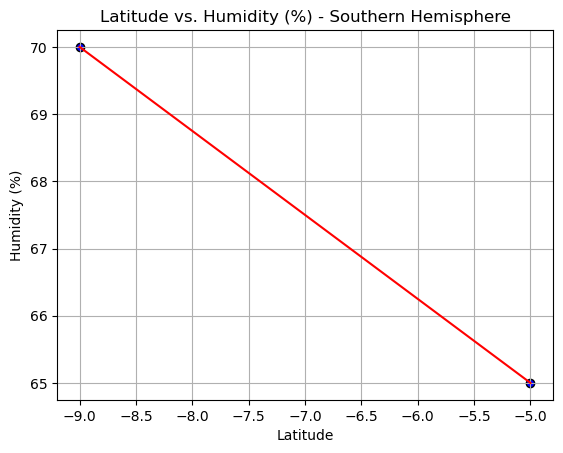

In [66]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The data shows little to no connection between latitude and humidity. The linear equations for both hemispheres indicate a very slight positive correlation, suggesting that distance from the equator has minimal effect on humidity. The scatter plot illustrates that the data points are too widely spread to establish a reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = -0.21x + 22.21
The r-value is: -0.32732683535398854


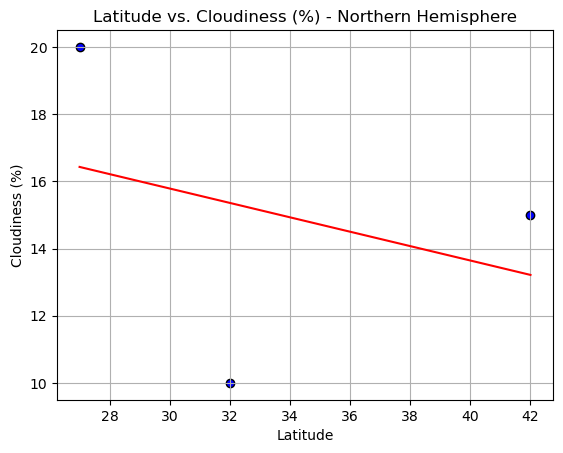

In [67]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -1.25x + 18.75
The r-value is: -1.0


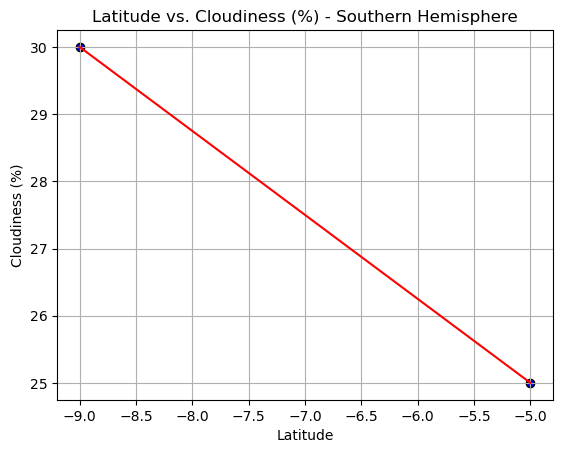

In [68]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** he data indicates minimal to no relationship between latitude and cloudiness. Although the linear equations for both hemispheres show a positive correlation, this suggests that distance from the equator does not significantly impact cloudiness. The scatter plot reveals that the data points are too widely dispersed to establish any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.07x + 10.07
The r-value is: -0.21677749238102997


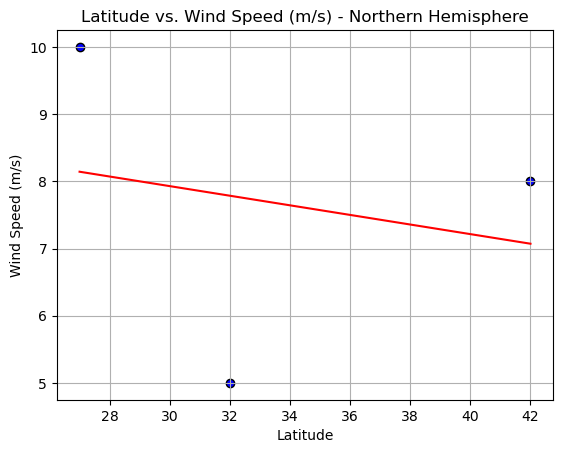

In [69]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()


Linear equation: y = -0.75x + 8.25
The r-value is: -1.0


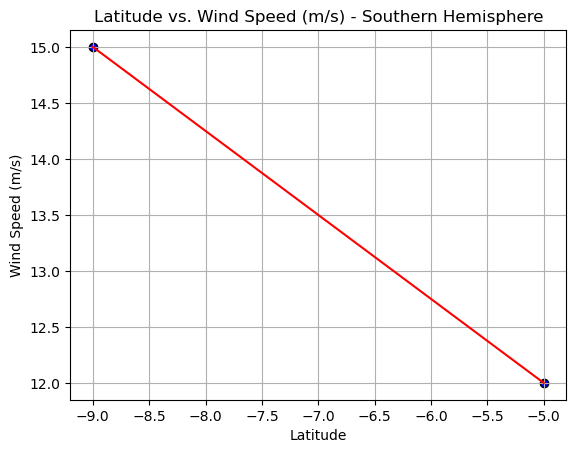

In [70]:

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There appears to be minimal to no correlation between latitude and wind speed in the available data. The r-value is low in both the northern and southern hemispheres, and the scatter plot indicates that the data points are too widely dispersed to suggest any meaningful relationship between latitude and wind speed.

